# Deephyper analytics - hyperparameter search study
**path to data file**: /lus/theta-fs0/projects/datascience/foremans/sdl_workshop/sdl_ai_workshop/03_distributedHyperOpt/01_BasicHPS/db/data/mnist_hps/mnist_hps_00c48a73/results.csv

for customization please see: https://matplotlib.org/api/matplotlib_configuration_api.html

## Setup & Data loading

In [1]:
path_to_data_file = '/lus/theta-fs0/projects/datascience/foremans/sdl_workshop/sdl_ai_workshop/03_distributedHyperOpt/01_BasicHPS/db/data/mnist_hps/mnist_hps_00c48a73/results.csv'

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from datetime import datetime
from tqdm import tqdm
from IPython.display import display, Markdown

width = 21
height = width/1.618

matplotlib.rcParams.update({
    'font.size': 21,
    'figure.figsize': (width, height), 
    'figure.facecolor': 'white', 
    'savefig.dpi': 72, 
    'figure.subplot.bottom': 0.125, 
    'figure.edgecolor': 'white',
    'xtick.labelsize': 21,
    'ytick.labelsize': 21})

df = pd.read_csv(path_to_data_file)

display(Markdown(f'The search did _{df.count()[0]}_ **evaluations**.'))

df.head()

The search did _12_ **evaluations**.

,activation,batch_size,dropout1,dropout2,epochs,optimizer,units1,units2,objective,elapsed_sec
0,relu,8,0.000000,0.000000,5,SGD,1,2,0.3248,211.302345
1,tanh,157,0.803981,0.981058,289,RMSprop,27,32,0.2982,832.022673
2,elu,478,0.475005,0.880282,35,SGD,27,4,0.5419,104.524633
3,relu,294,0.562303,0.117848,239,RMSprop,21,47,0.8425,600.721196
4,selu,184,0.494316,0.955905,248,RMSprop,40,64,0.9257,942.183765


## Statistical summary

In [3]:
df.describe()

,batch_size,dropout1,dropout2,epochs,units1,units2,objective,elapsed_sec
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,229.083333,0.452256,0.422987,255.833333,35.833333,34.916667,0.705433,1546.368172
std,120.546074,0.344371,0.368225,142.915635,21.699742,19.947469,0.295313,1000.503223
min,8.000000,0.000000,0.000000,5.000000,1.000000,2.000000,0.232900,104.524633
25%,149.250000,0.112920,0.116286,220.250000,20.250000,26.250000,0.487625,774.197304
50%,261.000000,0.484661,0.302696,247.000000,33.500000,37.000000,0.881900,1636.466865
75%,286.500000,0.801771,0.777584,316.250000,57.500000,49.250000,0.934875,2292.156086
max,478.000000,0.939608,0.981058,470.000000,63.000000,64.000000,0.978600,3097.076164


## Search trajectory

<Figure size 1512x934.487 with 0 Axes>

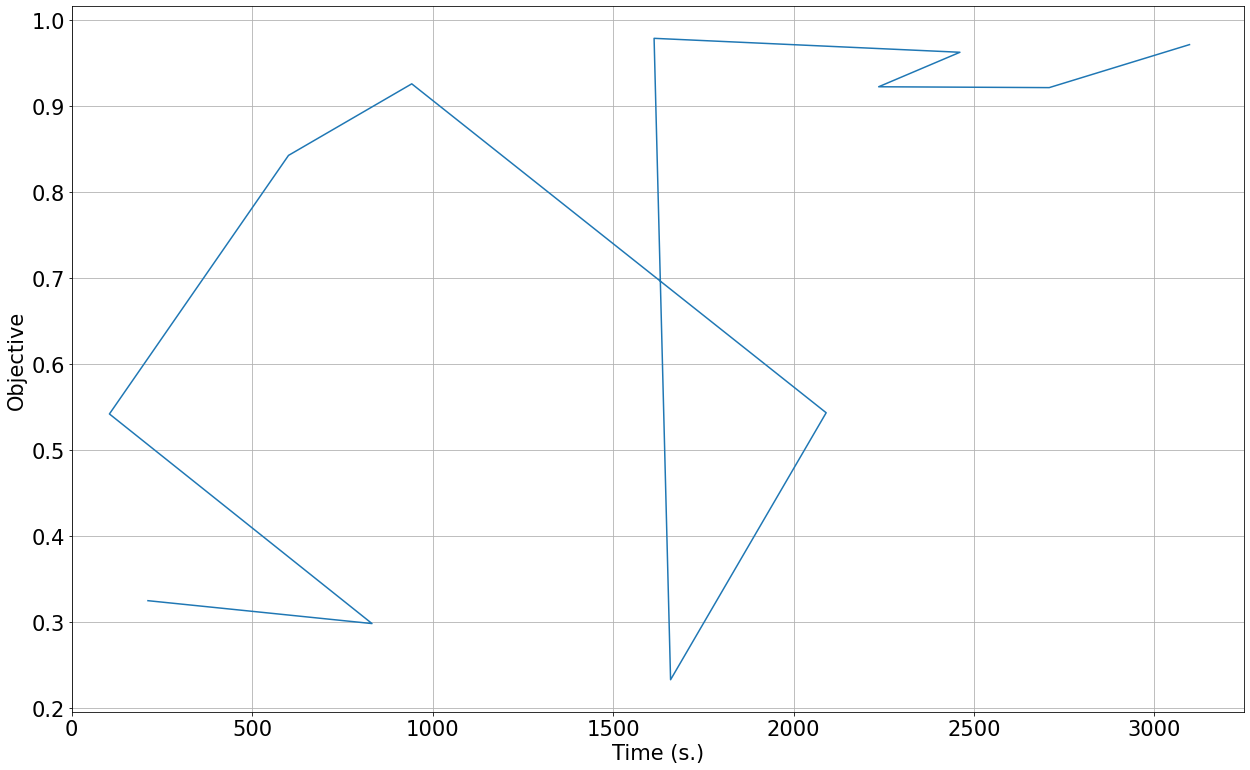

In [4]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(df.elapsed_sec, df.objective)
ax.set_ylabel('Objective')
ax.set_xlabel('Time (s.)')
ax.set_xlim(0)
ax.grid()
fig.show()

## Pairplots

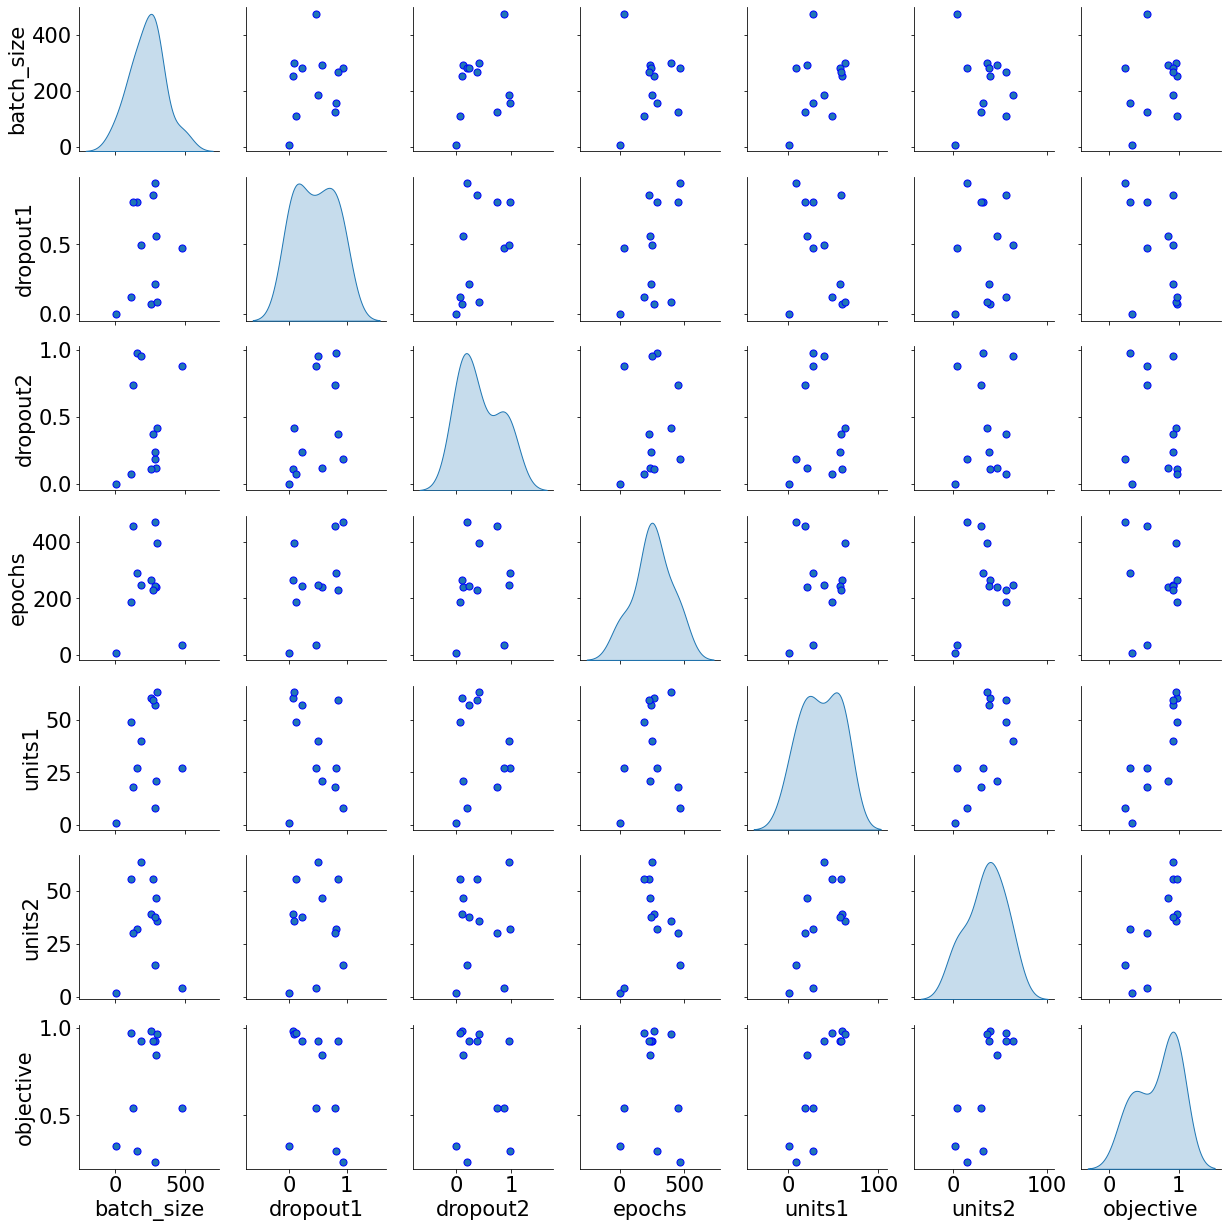

In [5]:
not_include = ['elapsed_sec']
sns.pairplot(df.loc[:, filter(lambda n: n not in not_include, df.columns)],
                diag_kind="kde", markers="o",
                plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                diag_kws=dict(shade=True))
plt.show()

<Figure size 1512x934.487 with 0 Axes>

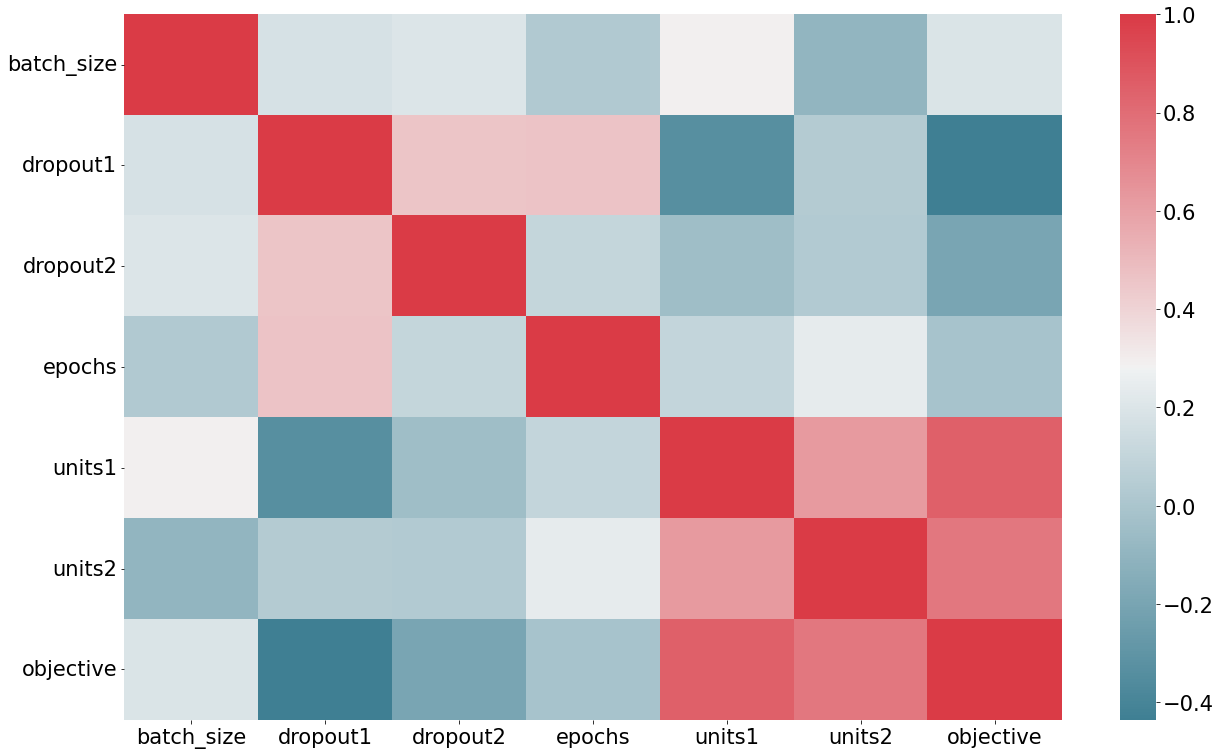

In [6]:
fig = plt.figure()
fig, ax = plt.subplots()
corr = df.loc[:, filter(lambda n: n not in not_include, df.columns)].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax)
ax.set_yticklabels(corr.columns, va='center')
plt.show()

## Best objective

In [7]:
i_max = df.objective.idxmax()
df.iloc[i_max]

activation          selu
batch_size           254
dropout1       0.0697666
dropout2        0.111602
epochs               265
optimizer        RMSprop
units1                60
units2                39
objective         0.9786
elapsed_sec      1613.62
Name: 7, dtype: object

In [8]:
dict(df.iloc[i_max])

{'activation': 'selu',
 'batch_size': 254,
 'dropout1': 0.06976661005072171,
 'dropout2': 0.11160200110384666,
 'epochs': 265,
 'optimizer': 'RMSprop',
 'units1': 60,
 'units2': 39,
 'objective': 0.9786000251770021,
 'elapsed_sec': 1613.6248347759247}